In [40]:
import pandas as pd
import numpy as np
import random
from faker import Faker

fake = Faker()

# Department and role mapping
department_roles = {
    "HR": ["HR Executive", "HR Manager", "Recruiter"],
    "IT": ["Software Engineer", "DevOps Engineer", "Data Scientist", "System Admin"],
    "Finance": ["Accountant", "Financial Analyst", "Finance Manager"],
    "Sales": ["Sales Executive", "Sales Manager", "Business Development"],
    "Marketing": ["Marketing Executive", "SEO Specialist", "Marketing Manager"],
    "Operations": ["Operations Executive", "Operations Manager"],
    "R&D": ["Research Analyst", "Data Scientist", "Product Developer"],
    "Admin": ["Office Assistant", "Admin Executive", "Admin Manager"]
}

# Base salary ranges (Lakhs per annum)
department_salary = {
    "HR": (300000, 1200000),
    "IT": (400000, 3500000),
    "Finance": (500000, 2500000),
    "Sales": (300000, 1800000),
    "Marketing": (300000, 1500000),
    "Operations": (300000, 1200000),
    "R&D": (600000, 4000000),
    "Admin": (250000, 1000000)
}

# More realistic salary ranges and progression
def generate_realistic_dataset(n=200000, save_path="employee_salary_data.csv"):
    data = []
    
    # Realistic fresher base salaries (in INR)
    fresher_base_salary = {
        "HR": 300000,      # 3 LPA
        "IT": 450000,      # 4.5 LPA  
        "Finance": 400000, # 4 LPA
        "Sales": 350000,   # 3.5 LPA
        "Marketing": 380000, # 3.8 LPA
        "Operations": 320000, # 3.2 LPA
        "R&D": 500000,     # 5 LPA
        "Admin": 280000    # 2.8 LPA
    }
    
    for _ in range(n):
        name = fake.name()
        gender = random.choices(["Male", "Female"], weights=[0.6, 0.4])[0]
        age = np.random.randint(22, 60)
        
        years_exp = max(0, np.random.normal(loc=age-22, scale=3))
        years_exp = min(years_exp, age-21)
        years_exp = max(0, round(years_exp))
        
        dept = random.choice(list(department_roles.keys()))
        role = random.choice(department_roles[dept])
        
        performance = random.choices([1,2,3,4,5], weights=[0.05,0.15,0.4,0.3,0.1])[0]
        
        # More realistic salary calculation
        base_salary = fresher_base_salary[dept]
        
        # Experience multiplier: 8-15% growth per year
        exp_multiplier = 1 + (years_exp * random.uniform(0.08, 0.15))
        
        # Performance bonus: 0-50% based on score
        perf_bonus = 1 + ((performance - 3) * 0.125)  # -25% to +25%
        
        # Department growth potential
        dept_cap_multiplier = {
            "IT": 4.5, "R&D": 4.0, "Finance": 3.0, 
            "Sales": 2.8, "Marketing": 2.5, "HR": 2.2, 
            "Operations": 2.0, "Admin": 1.8
        }
        
        salary = base_salary * exp_multiplier * perf_bonus
        
        # Cap based on department and experience
        max_possible = base_salary * dept_cap_multiplier[dept]
        salary = min(salary, max_possible)
        
        data.append([name, age, gender, dept, role, years_exp, performance, int(salary)])
    
    df = pd.DataFrame(data, columns=[
        "Name", "Age", "Gender", "Department", "Role", 
        "YearsExperience", "PerformanceScore", "CurrentSalary"
    ])
    
    df.to_csv(save_path, index=False)
    print(f"✅ Realistic dataset generated: {save_path}")
    return df

# Generate new realistic dataset
data = generate_realistic_dataset(200000,"employee_salary_data.csv")

✅ Realistic dataset generated: employee_salary_data.csv


In [44]:
import pandas as pd
import numpy as np

In [45]:
pd.set_option("display.float_format", "{:,.0f}".format)

In [46]:
data = pd.read_csv("employee_salary_data.csv")

In [47]:
data.head()

,Name,Age,Gender,Department,Role,YearsExperience,PerformanceScore,CurrentSalary
0,Laura Nelson,43,Female,R&D,Research Analyst,20,3,1761304
1,Brian Webb,50,Male,Admin,Office Assistant,28,3,504000
2,Alexandria Bond,44,Male,Marketing,Marketing Executive,21,3,950000
3,Jamie Dominguez,52,Female,Sales,Business Development,31,4,979999
4,Dakota Miller,46,Male,Sales,Business Development,25,3,979999


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Name              200000 non-null  object
 1   Age               200000 non-null  int64 
 2   Gender            200000 non-null  object
 3   Department        200000 non-null  object
 4   Role              200000 non-null  object
 5   YearsExperience   200000 non-null  int64 
 6   PerformanceScore  200000 non-null  int64 
 7   CurrentSalary     200000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.2+ MB


In [49]:
data.shape

(200000, 8)

In [50]:
data.isna().sum()

Name                0
Age                 0
Gender              0
Department          0
Role                0
YearsExperience     0
PerformanceScore    0
CurrentSalary       0
dtype: int64

In [51]:
data.duplicated().sum()

9

In [52]:
data.drop_duplicates(inplace=True)

In [53]:
data.head()

,Name,Age,Gender,Department,Role,YearsExperience,PerformanceScore,CurrentSalary
0,Laura Nelson,43,Female,R&D,Research Analyst,20,3,1761304
1,Brian Webb,50,Male,Admin,Office Assistant,28,3,504000
2,Alexandria Bond,44,Male,Marketing,Marketing Executive,21,3,950000
3,Jamie Dominguez,52,Female,Sales,Business Development,31,4,979999
4,Dakota Miller,46,Male,Sales,Business Development,25,3,979999


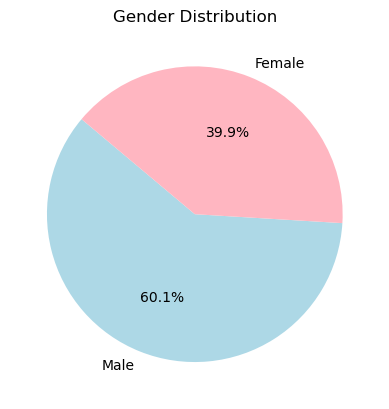

In [71]:
import matplotlib.pyplot as plt

data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
plt.title("Gender Distribution")
plt.ylabel("")
plt.savefig("screenshots/gender_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

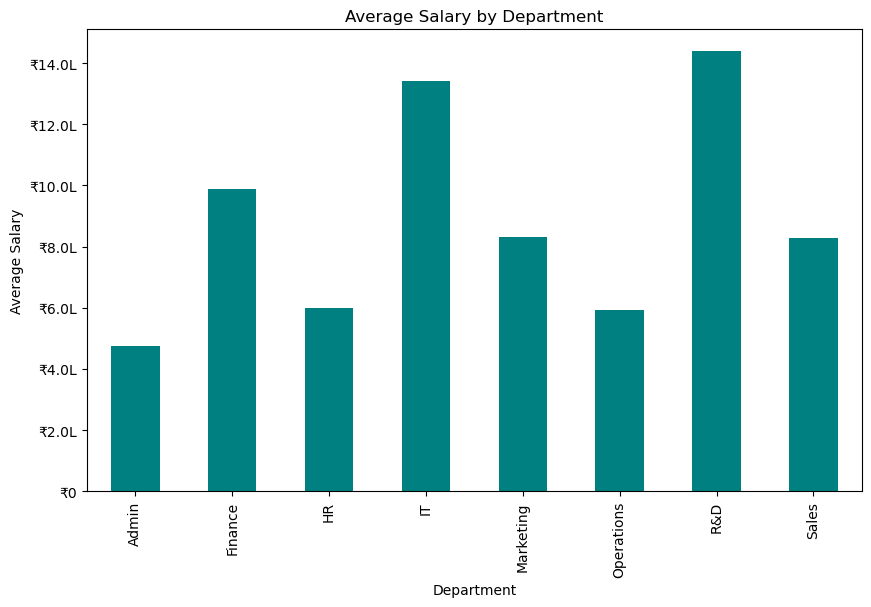

In [72]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to format numbers in Indian style (Lakhs)
def format_indian_currency(x, pos):
    if x >= 1e7:  # 1 crore and above
        return f"₹{x/1e7:.1f}Cr"
    elif x >= 1e5:  # 1 lakh and above
        return f"₹{x/1e5:.1f}L"
    else:
        return f"₹{x:,.0f}"

plt.figure(figsize=(10,6))
data.groupby("Department")["CurrentSalary"].mean().plot(kind="bar", color="teal")

plt.ylabel("Average Salary")
plt.title("Average Salary by Department")

# Use Indian currency formatting
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_indian_currency))
plt.savefig("screenshots/average_salary_by_department.png", dpi=300, bbox_inches='tight')
plt.show()

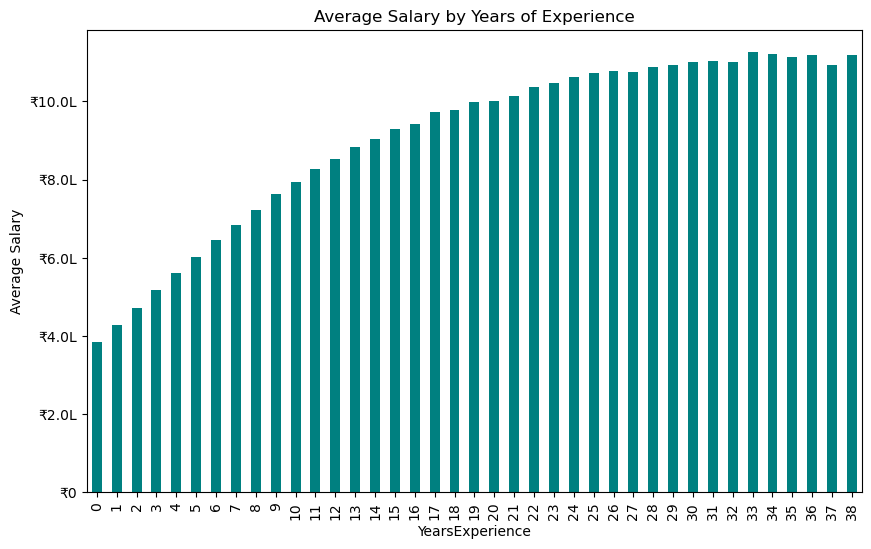

In [73]:
plt.figure(figsize=(10,6))
data.groupby("YearsExperience")["CurrentSalary"].mean().plot(kind="bar", color="teal")

plt.ylabel("Average Salary")
plt.title("Average Salary by Years of Experience")

# Use Indian currency formatting
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_indian_currency))
plt.savefig("screenshots/average_salary_by_experience.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
data['CurrentSalary'].describe()

count     199,991
mean      888,243
std       447,610
min       210,000
25%       561,046
50%       710,901
75%     1,034,284
max     2,025,000
Name: CurrentSalary, dtype: float64

In [58]:
data.columns

Index(['Name', 'Age', 'Gender', 'Department', 'Role', 'YearsExperience',
       'PerformanceScore', 'CurrentSalary'],
      dtype='object')

In [59]:
x = data[["YearsExperience", "Department", "Age", "PerformanceScore"]]
y = data["CurrentSalary"]

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
# Handle the categorical Department variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode Department for training and test sets
x_train_encoded = x_train.copy()
x_test_encoded = x_test.copy()

x_train_encoded['Department'] = le.fit_transform(x_train['Department'])
x_test_encoded['Department'] = le.transform(x_test['Department'])

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Now train the model with the encoded data
lr.fit(x_train_encoded, y_train)

LinearRegression()

In [63]:
len(x_train), len(x_test), len(y_train), len(y_test)

(159992, 39999, 159992, 39999)

In [64]:

predictions = lr.predict(x_test_encoded)

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

671207.3088878577

In [65]:
import joblib
joblib.dump(lr, "salary_prediction_model.pkl")


['salary_prediction_model.pkl']